# Wrangle and Analyse

### Table of Contents
1. [Introduction](#intro)
2. [Data Gathering](#gather)
3. [Data Assessment](#assess)
    1. [Quality](#quality)
    2. [Tidiness](#tidy)
3. [Data Cleaning and Transformation](#clean)
3. [Storing Data, Analysis and Visualization](#viz)

<a id='intro'></a>
# Introduction
> - WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. The account was started in 2015 by college student Matt Nelson, and has received international media attention for its popularity.
- WeRateDogs asks people to send photos of their dogs, then tweets selected photos rating and a humorous comment. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10".
- The datasets include information archived from twitter and data obtained after running classifier nodels on pictures to find dog breed. We also need to retieve additional data using Twitter API.

-------------
NOTE FOR REVIEWER: Respected Sir/Madam, I have downloaded additional data from Udacity Classroom because twitter keeps suspending my account due to inactivity and download process stops in middle.  

<a id='gather'></a>
# Data Gathering

> Data will be gathered from three resources:
- The **twitter_archive_enhanced.csv** file containing data from WeRateDogs Twitter archive.
- **image-predictions-3.tsv** The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.
- **Twitter API and Tweepy library** to gather each tweet's retweet count and minimum favorite("like") count, and any additional data of interest.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
%matplotlib inline

import os
import json
import requests, datetime
import tweepy

In [2]:
pd.options.display.max_rows = None

In [3]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df_arch.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Unnamed: 17,Unnamed: 18
9,8.902403e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,NaN,NaN
1633,6.842416e+17,NaN,NaN,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None,NaN,NaN
1086,7.381664e+17,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738166403...,12,10,Axel,None,None,None,None,NaN,NaN
1923,6.740829e+17,NaN,NaN,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674082852...,11,10,a,None,None,None,None,NaN,NaN
2107,6.704658e+17,NaN,NaN,2015-11-28 04:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Silly dog here. Wearing bunny ears. Nice long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670465786...,7,10,None,None,None,None,None,NaN,NaN
1205,7.159284e+17,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,None,None,None,None,NaN,NaN
1052,7.425281e+17,NaN,NaN,2016-06-14 01:24:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's pumped as hell for the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,None,None,None,None,NaN,NaN
1323,7.062660e+17,NaN,NaN,2016-03-05 23:51:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,None,None,None,None,NaN,NaN
1674,6.822595e+17,NaN,NaN,2015-12-30 17:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524...,9,10,Jax,None,None,None,None,NaN,NaN
1341,7.048479e+17,NaN,NaN,2016-03-02 01:56:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hi could I get a number 4 with no pickles...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/704847917...,12,10,None,None,None,None,None,NaN,NaN


In [5]:
# downloading image_predictions.tsv. It is a tab seperated value file

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
data_request = requests.get(url, allow_redirects = True)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(data_request.content)

    
df_imag = pd.read_csv('image_predictions.tsv', sep='\t' )

In [6]:
df_imag.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
193,669571471778410496,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1,minivan,0.873488,False,pickup,0.041259,False,beach_wagon,0.015400,False
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
184,669354382627049472,https://pbs.twimg.com/media/CUoGQjdXAAAkaz2.jpg,1,Chihuahua,0.973990,True,French_bulldog,0.010832,True,Pekinese,0.002099,True
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,space_heater,0.206876,False,spatula,0.123450,False,vacuum,0.119218,False
1360,761004547850530816,https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1245,747512671126323200,https://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg,1,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True
112,667911425562669056,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,1,frilled_lizard,0.257695,False,ox,0.235160,False,triceratops,0.085317,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,0.003879,True
623,680583894916304897,https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg,1,tub,0.889801,False,bathtub,0.032351,False,hippopotamus,0.014177,False


In [7]:
# I couldn't download data using twitter api because twitter keeps supspending my account because of inactivity
# I have used the file provided by instructors instead.
df_add = pd.read_json('tweet-json.txt', lines = True)

In [8]:
# df_add.head()
df_add = df_add[['id', 'favorite_count', 'retweet_count']]

# change column name in json dataset
df_add = df_add.rename(columns = {'id': 'tweet_id'})

In [9]:
df_add.head(10)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [10]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<a id='assess'></a>
# Data Assessment

**1**. First we'll assess twitter archive dataset

In [11]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         223 non-null    object 
 7   retweeted_status_user_id    184 non-null    object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2257 non-null   object 
 10  rating_numerator            2351 non-null   object 
 11  rating_denominator          2356 non-null   object 
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df_arch.sample(20) # don't rerun. Remove this comment later

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Unnamed: 17,Unnamed: 18
776,7.761133e+17,NaN,NaN,2016-09-14 17:40:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He's about to get hit with a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None,NaN,NaN
1991,6.726223e+17,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None,NaN,NaN
242,8.461538e+17,NaN,NaN,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vixen. He really likes bananas. Steals...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846153765...,13,10,Vixen,None,None,None,None,NaN,NaN
756,7.786505e+17,NaN,NaN,2016-09-21 17:42:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strider. He thinks he's a sorority girl. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778650543...,10,10,Strider,None,None,None,None,NaN,NaN
1556,6.888286e+17,NaN,NaN,2016-01-17 21:01:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,None,None,None,None,NaN,NaN
624,7.954643e+17,NaN,NaN,2016-11-07 03:14:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/795464331...,13,10,None,doggo,None,None,None,NaN,NaN
1664,6.827884e+17,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from your fav holiday squad! 🎉 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441...,12,10,None,None,None,pupper,None,NaN,NaN
974,7.500567e+17,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,None,None,None,None,NaN,NaN
1029,7.457126e+17,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Percy. He fell asleep at the wheel. Ir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,None,None,None,None,NaN,NaN
899,7.588287e+17,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None,NaN,NaN


In [13]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id
count,2.356000e+03,7.800000e+01,7.800000e+01
mean,7.427716e+17,7.455079e+17,2.014171e+16
std,6.856705e+16,7.582492e+16,1.252797e+17
min,6.660209e+17,6.658147e+17,1.185634e+07
25%,6.783989e+17,6.757419e+17,3.086374e+08
50%,7.196279e+17,7.038708e+17,4.196984e+09
75%,7.993373e+17,8.257804e+17,4.196984e+09
max,8.924206e+17,8.862664e+17,8.405479e+17


In [14]:
df_arch.shape

(2356, 19)

In [15]:
# look for duplicates
df_arch.duplicated().sum()

0

In [16]:
# look for NaN values
df_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2133
retweeted_status_user_id      2172
retweeted_status_timestamp    2175
expanded_urls                   99
rating_numerator                 5
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
Unnamed: 17                   2312
Unnamed: 18                   2353
dtype: int64

Most of the values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and Unamed 17/18 are null.

In [17]:
# better look at null values
df_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2133
retweeted_status_user_id      2172
retweeted_status_timestamp    2175
expanded_urls                   99
rating_numerator                 5
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
Unnamed: 17                   2312
Unnamed: 18                   2353
dtype: int64

In [18]:
df_arch['tweet_id'].value_counts()

6.700691e+17    1
8.334796e+17    1
7.931355e+17    1
6.918203e+17    1
8.447048e+17    1
6.715288e+17    1
6.737163e+17    1
6.735768e+17    1
6.715186e+17    1
7.707728e+17    1
7.591599e+17    1
6.939932e+17    1
8.139446e+17    1
7.435954e+17    1
7.417933e+17    1
8.018550e+17    1
6.935908e+17    1
7.005181e+17    1
7.454227e+17    1
7.142141e+17    1
8.116272e+17    1
8.312626e+17    1
6.733598e+17    1
6.849400e+17    1
7.860513e+17    1
7.852648e+17    1
7.547471e+17    1
8.090848e+17    1
8.131423e+17    1
6.736897e+17    1
8.313228e+17    1
6.671828e+17    1
6.842004e+17    1
6.666914e+17    1
6.695837e+17    1
7.884121e+17    1
6.692037e+17    1
7.320056e+17    1
8.729671e+17    1
8.703090e+17    1
6.871027e+17    1
6.874807e+17    1
6.916757e+17    1
7.327322e+17    1
7.504293e+17    1
6.870961e+17    1
6.828090e+17    1
7.757292e+17    1
7.207753e+17    1
8.518614e+17    1
7.746394e+17    1
8.380858e+17    1
6.760987e+17    1
8.047388e+17    1
6.826388e+17    1
8.896654e+

In [19]:
df_arch['retweeted_status_id'].value_counts()

7.91406955684368E+017                                                                                                                          1
6.79462823135687E+017                                                                                                                          1
7.86709082849829E+017                                                                                                                          1
8.68552278524838E+017                                                                                                                          1
7.46757706116112E+017                                                                                                                          1
8.19227688460239E+017                                                                                                                          1
6.84830982659281E+017                                                                                                             

In [20]:
df_arch['retweeted_status_user_id'].value_counts()

4196983835                                                                              154
4296831739                                                                                2
195036846                                                                                 1
783214                                                                                    1
 5/10 https://t.co/6NgsQJuSBJ                                                             1
341021133                                                                                 1
 rad mohawk. One stays woke while one sleeps. 10/10 for both https://t.co/MpH1Fe9LhZ      1
487197737                                                                                 1
 10/10 https://t.co/MuqHPvtL8c                                                            1
726634734                                                                                 1
6.98195409219559E+017                                                           

In [21]:
with pd.option_context('max_colwidth', None):
    regex_pat = r'\d+/\d+'
    display(df_arch[df_arch['retweeted_status_id'].str.contains(regex_pat, na = False)][['tweet_id','text','retweeted_status_id']])

,tweet_id,text,retweeted_status_id
113,8.707263e+17,@ComplicitOwl @ShopWeRateDogs &gt,10/10 is reserved for dogs
273,8.407289e+17,RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp,getting tangled in leash. 12/10 I would kill for Pipsy https://…
274,8.406986e+17,@0_kelvin_0 &gt,10/10 is reserved for puppos sorry Kevin
485,8.145784e+17,RT @dog_rates: Meet Beau &amp,Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
976,7.500266e+17,Meet Jax &amp,Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI
1104,7.351370e+17,Meet Buckley. His family &amp,some neighbors came over to watch him perform but he's nervous af. 9/10 u got this pupper https://t.co/5bdCpPlno9
1179,7.193678e+17,Meet Sid &amp,Murphy. Murphy floats alongside Sid and whispers motivational quotes in his ear. Magical af. Both 11/10 https://t.co/7mmjyearQW
1199,7.167911e+17,Meet Jennifur. She's supposed to be navigating. Not even buckled up. Insubordinate &amp,churlish. 11/10 would still pet https://t.co/h0trcJohYO
1421,6.981954e+17,Meet Beau &amp,Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk
1465,6.943528e+17,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp,can't bark for shit. 10/10 &amp


- part of text in some tweets have been interpreted as retweet status ID

In [22]:
df_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
df_arch['expanded_urls'].value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      2
https://twitter.com/dog_rates/status/687317306314240000/photo/1,https://twitter.com/dog_rates/status/687317306314240000/photo/1                                                                                                                                                                                                                                                                                                                                                                    

In [24]:
df_arch['expanded_urls'].duplicated().sum()

175

In [25]:
df_arch['rating_numerator'].value_counts()
ct_counts1 = df_arch.groupby(['rating_numerator'])['rating_numerator'].count()
ct_counts1.reset_index(name = 'count')

,rating_numerator,count
0,0,2
1,1,9
2,10,446
3,11,453
4,12,556
5,121,1
6,13,350
7,14,54
8,143,1
9,144,1


In [26]:
ct_counts2 = df_arch.groupby(['rating_denominator'])['rating_denominator'].count()
ct_counts2.reset_index(name = 'count')

,rating_denominator,count
0,0,1
1,10,2302
2,11,13
3,110,1
4,12,2
5,120,1
6,13,1
7,130,1
8,15,1
9,150,1


As we can see above there are some wrong values for numerator and denominators with some values being twitter links. As the data is extracted from tweet texts, it's worth checking if there was some error while extracting ratings.

- Now let's take look at numerators and denominators that are twitter links.

In [27]:
pd.options.display.max_rows = None
with pd.option_context('max_colwidth', None):
    regex_pat = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'
    display(df_arch[df_arch['rating_numerator'].str.contains(regex_pat, na = False)][['tweet_id','text','rating_numerator']])

/home/akshay/SoftwaresByNet/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
273,8.407289e+17,RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp,https://twitter.com/dog_rates/status/667152164079423490/photo/1
485,8.145784e+17,RT @dog_rates: Meet Beau &amp,https://twitter.com/dog_rates/status/698195409219559425/photo/1
976,7.500266e+17,Meet Jax &amp,https://twitter.com/dog_rates/status/750026558547456000/photo/1
1104,7.351370e+17,Meet Buckley. His family &amp,https://twitter.com/dog_rates/status/735137028879360001/photo/1
1179,7.193678e+17,Meet Sid &amp,https://twitter.com/dog_rates/status/719367763014393856/photo/1
1199,7.167911e+17,Meet Jennifur. She's supposed to be navigating. Not even buckled up. Insubordinate &amp,https://twitter.com/dog_rates/status/716791146589110272/photo/1
1421,6.981954e+17,Meet Beau &amp,https://twitter.com/dog_rates/status/698195409219559425/photo/1
1481,6.932807e+17,This is Sadie and her 2 pups Shebang &amp,https://twitter.com/dog_rates/status/693280720173801472/photo/1
1508,6.914830e+17,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1"
1524,6.905972e+17,This is Lolo. She's America af. Behind in science &amp,https://twitter.com/dog_rates/status/690597161306841088/photo/1


In [28]:
with pd.option_context('max_colwidth', None):
    regex_pat = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'
    display(df_arch[df_arch['rating_denominator'].str.contains(regex_pat, na=False)][['tweet_id','text','rating_denominator']])

/home/akshay/SoftwaresByNet/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_denominator
1366,7.026711e+17,Meet Rambo &amp,https://twitter.com/dog_rates/status/702671118226825216/photo/1
1465,6.943528e+17,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1"
1538,6.898360e+17,Meet Fynn &amp,https://twitter.com/dog_rates/status/689835978131935233/photo/1


- Now we'll check for correctness of numerators other than links which obviosly wrong

In [29]:
# create list of denominators which are int
new_df = df_arch[~df_arch['rating_denominator'].str.contains(regex_pat, na = False)]
list(new_df['rating_denominator'].value_counts().index)

/home/akshay/SoftwaresByNet/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


['10',
 '11',
 '9',
 '50',
 '5',
 '12',
 '20',
 '80',
 '8',
 '2',
 '90',
 '110',
 '7',
 '16',
 '0',
 '15',
 '120',
 '70',
 '170',
 '13',
 '130',
 '40',
 '150']

In [30]:
peculiar_denom = ['11', '9', '2', '12', '8', '5', '15', '7', '16', '50', '130', '110', '170', '90']
with pd.option_context('max_colwidth', None):
    display(df_arch[df_arch['rating_denominator'].isin(peculiar_denom)][['tweet_id','text','rating_denominator']])

,tweet_id,text,rating_denominator
273,8.407289e+17,RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp,12
342,8.320886e+17,@docmisterio account started on 11/15/15,15
485,8.145784e+17,RT @dog_rates: Meet Beau &amp,9
516,8.109847e+17,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,7.750966e+17,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
1068,7.403732e+17,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1104,7.351370e+17,Meet Buckley. His family &amp,9
1120,7.311560e+17,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1179,7.193678e+17,Meet Sid &amp,11
1199,7.167911e+17,Meet Jennifur. She's supposed to be navigating. Not even buckled up. Insubordinate &amp,11


It can be seen that denominators which larger than 10 and also multiple of 10 are for **multiple dogs**. Denominators which not multiple of 10 are because of problems in tweet. There are some tweets with dates like 9/11 and ratios like 1/2 which are interpreted as ratings. We'll these will be discared as there numbers are very few.

In [31]:
# create list of numerators which are int
new_df = df_arch[~df_arch["rating_numerator"].str.contains(regex_pat, na = False)]
list(new_df['rating_numerator'].value_counts().index)

/home/akshay/SoftwaresByNet/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


['12',
 '11',
 '10',
 '13',
 '9',
 '8',
 '7',
 '14',
 '5',
 '6',
 '3',
 '4',
 '1',
 '2',
 '420',
 '15',
 '75',
 '0',
 '45',
 '99',
 '204',
 '27',
 '1776',
 '666',
 '17',
 '88',
 '182',
 '165',
 '60',
 '143',
 '144',
 '44',
 '24',
 '80',
 '26',
 '121',
 '84',
 '50',
 '20',
 '960']

In [32]:
peculiar_num = ['666', '75', '182', '420', '204', '143', '80', '144', '960', '0', '1', '2', '3', '4', '5', '6']
with pd.option_context('max_colwidth', None):
    display(df_arch[df_arch['rating_numerator'].isin(peculiar_num)][['tweet_id','text','rating_numerator']])

,tweet_id,text,rating_numerator
45,8.834828e+17,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
188,8.558627e+17,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,8.558601e+17,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
229,8.482121e+17,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6
290,8.381503e+17,@markhoppus 182/10,182
313,8.352464e+17,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
315,8.351524e+17,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
340,8.322159e+17,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
605,7.985769e+17,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1
695,7.867091e+17,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75


Some ratings are very big because dogs are extra cute or it is rating for group of dogs. But in some cases it happens because of decimal ratings. At some places ratings are wrong because tweets contain ratios like 1/2 or dates like 9/11. Otherwise smaller ratings are associated with dogs misbehaving.

- analysing the above data, I found that some ratings are in decimal form. 

In [33]:
# Let's have a look at decimal ratings here in more detail
with pd.option_context('max_colwidth', None):
    regex_pat = '[a-zA-Z\d*]*\d+\.\d*/\d+[a-zA-Z\d*]*'
    display(df_arch[df_arch['text'].str.contains(regex_pat)][['tweet_id','text','rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,8.834828e+17,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,8.322159e+17,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,7.867091e+17,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,7.780270e+17,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,6.813407e+17,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,6.804947e+17,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


By examining the tweets we found out that there are errors in numerators due to ratings having fractional values.

In [34]:
pd.options.display.max_rows = None
df_arch['name'].value_counts(dropna=False)

None              734
a                  55
10                 43
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Tucker             10
Lola               10
Penny               9
Bo                  9
Winston             9
Bailey              7
the                 7
Buddy               7
Toby                7
an                  7
Sadie               7
Rusty               6
Daisy               6
Leo                 6
Koda                6
Jack                6
Dave                6
Bella               6
Stanley             6
Milo                6
Scout               6
Oscar               6
Chester             5
Jax                 5
Larry               5
Oakley              5
Alfie               5
Sammy               5
Louis               5
Phil                5
Gus                 5
Finn                5
Sunny               5
Bentley             5
very                5
George              5
Riley               4
Ruby                4
Walter    

In [35]:
non_name_candidates = ['None']
for name in list(df_arch['name'].unique()):
    if name == 'None': continue
    if len(name) <= 3 or name[0].islower():
        non_name_candidates.append(name)
# non_name_candidates = np.array(non_name_candidates)
# non_name_candidates
print(non_name_candidates)

['None', 'Jax', 'Ted', 'Jim', 'such', 'Gus', 'Rey', 'a', 'Aja', 'Jed', '10', 'quite', 'Leo', 'Ken', 'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Mo', 'Bo', 'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'incredibly', 'Doc', 'mad', 'Jay', 'Mya', 'an', 'very', 'O', 'Al', 'just', 'Lou', 'my', 'Eve', 'Dex', 'Ace', 'Zoe', 'Blu', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'Ole', 'Bob', 'the', '11', 'Obi', 'by', 'Evy', 'officially', 'Tug', 'life', 'Dot', 'Mac', 'Ed', 'Taz', 'light', 'Cal', 'space', 'JD', 'Pip', 'Amy', 'Edd', 'Dug', 'Jo', 'Ron', 'Stu']


In [36]:
no_names = ['such', 'a', '10', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'O', 'just', 'my',
           'his', 'actually', 'getting', 'this', 'by', 'life', 'the', 'light', 'space', 'officially', 'unacceptable',
            'all', 'old', 'infuriating']
with pd.option_context('max_colwidth', None):
    display(df_arch[df_arch['name'].isin(no_names)][['tweet_id','text','name']])

,tweet_id,text,name
22,8.875171e+17,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,8.815360e+17,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
113,8.707263e+17,@ComplicitOwl @ShopWeRateDogs &gt,10
118,8.699887e+17,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,8.591970e+17,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,8.554595e+17,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
273,8.407289e+17,RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp,10
274,8.406986e+17,@0_kelvin_0 &gt,10
335,8.326455e+17,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,8.286500e+17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one


Looks like string after 'Here is' and 'This is' were extracted as names. In most of the cases names are not available. Many names were not extracted properly because of   \'&\' in tweet.

In [37]:
df_arch['Unnamed: 17'].unique()

array([nan, 'None'], dtype=object)

In [38]:
df_arch['Unnamed: 18'].unique()

array([nan, 'None'], dtype=object)

**2.** Now let's assess image-predictor.tsv dataset

In [39]:
df_imag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
df_imag.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True
119,668171859951755264,https://pbs.twimg.com/media/CUXSwy8W4AA6uet.jpg,1,Chihuahua,0.664834,True,cowboy_boot,0.060343,False,giant_panda,0.059838,False
1849,839990271299457024,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,Staffordshire_bullterrier,0.604938,True,American_Staffordshire_terrier,0.311540,True,Boston_bull,0.037159,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True


In [41]:
df_imag.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [42]:
# look for duplicates
df_imag.duplicated().sum()

0

In [43]:
# look for NaN values
df_imag.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [44]:
# look for null values
df_imag.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [45]:
df_imag['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
770655142660169732    1
680494726643068929    1
676430933382295552    1
847251039262605312    1
749403093750648834    1
810657578271330305    1
797236660651966464    1
670783437142401025    1
779834332596887552    1
836677758902222849    1
713761197720473600    1
7048595586914140

In [46]:
df_imag['jpg_url'].value_counts()

https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg                                            2
https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg                                2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                       

In [47]:
df_imag['jpg_url'].duplicated().sum()

66

- we are having duplicate tweets or retweets as many urls are repeated.

In [48]:
df_imag['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [49]:
df_imag['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
teddy                              18
Eskimo_dog                         18
beagle                             18
Shetland_sheepdog                  18
Maltese_dog                        18
Lakeland_terrier                   17
Rottweiler  

In [50]:
df_imag['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
chow                               20
Samoyed                            20
malinois                           20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [51]:
df_imag['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

**3.** Analysing Additional data downloaded from twitter

In [52]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [53]:
df_add.sample(20)

,tweet_id,favorite_count,retweet_count
1174,719991154352222208,5281,1979
2235,668142349051129856,592,306
2260,667546741521195010,355,138
922,755206590534418437,18212,6148
317,834574053763584002,14993,2882
107,871515927908634625,20730,3628
336,832397543355072512,13126,2548
1444,696490539101908992,1339,170
2154,669597912108789760,550,163
741,780476555013349377,0,136


In [54]:
df_add.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [55]:
# look for duplicates
df_add.duplicated().sum()

0

In [56]:
# look for NaN values
df_add.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [57]:
# look for null values
df_add.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [58]:
df_add['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
666051853826850816    1
673686845050527744    1
738891149612572673    1
685315239903100929    1
842765311967449089    1
847251039262605312    1
702321140488925184    1
756651752796094464    1
782969140009107456    1
804413760345620481    1
753026973505581056    1
7048595586914140

In [59]:
df_add['favorite_count'].value_counts()

0         179
610         3
345         3
2918        3
1691        3
2176        3
2768        3
1339        3
2706        3
522         2
3134        2
1618        2
250         2
2250        2
2660        2
2262        2
2305        2
1111        2
784         2
4878        2
346         2
14685       2
780         2
6923        2
6515        2
2433        2
3603        2
13518       2
3593        2
1536        2
2451        2
2369        2
1194        2
2903        2
3701        2
8295        2
115         2
2594        2
121         2
10342       2
222         2
129         2
4229        2
3084        2
4249        2
3938        2
693         2
3736        2
4968        2
994         2
1180        2
3231        2
265         2
2363        2
7335        2
551         2
545         2
4004        2
3253        2
471         2
1273        2
2685        2
2420        2
375         2
2426        2
2593        2
1193        2
4489        2
1114        2
2669        2
4358        2
2613  

In [60]:
df_add['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
325      3
634      3
2334     3
608      3
602      3
3712     3
315      3
3220     3
4858     3
700      3
105      3
1320     3
424      3
3261     3
3917     3
1176     3
3        3
1116     3
2072     3
3129     3
1265     3
77       3
1231     3
231      3
896      3
888      3
119      3
1225     3
135      3
836      3
792      3
776      3
426      3
4319     3
2272     3
393      3
3732     3
138      3
937      3
1035     3
2970     3
2269     3
917      3
1011     3
88       3
234      3
242      3
1085     3
328      3
523      3
306      3
8237     2
2110     2
1268     2
2037     2
841      2
39       2
665      2
37       2
31       2
2894     2

<a id='control'></a>
## A. Quality

1. For Twitter Archive Dataset

    - The datatype of timestamp is object(string) instead of datetime object.
    - Some rows still have the HTML tags in source values.
    - tweet_id is integer which is why it is being rendered in scientific notation. Not clear to read and compare.
    - There are retweets in the dataset(as for some rows retweeted_status_id and retweeted_status_user_id are populated with numbers instead of NaN).
    - Dog Ratings are wrong at some places(wrong values fort he numerator and denominator). At some places numerartor and denominator has links and denominator is greater than 10.
    - Ratings are wrong in many rows. 
    - Many names for pets were peculiar(like 'are', 'and', 'mad').
    - The dataset looks cluttered due to large number of rows. Many rows will be not required for later analysis. We'll drop these columns after all above corrections.
    - Parts of text in some tweets have been interpreted as retweet status ID.
    
2. For Image Prediction Dataset
  
    - Many jpg_url values occurring twice. It implies there are many duplicate rows and same images were analysed because of retweets.
    - Many tweets contain animals other dogs or objects like ice lolly and basketball.

    

3. For Data from twitter API
    - I downloaded this dataset from Udacity workspace instead of doing it programmatically because of issues with my twitter account. Data looks clean with no tweet IDs being repeated and no NaN or Null values.


<a id='tidy'></a>
## B. Tidiness 

1. All tables should be combined in a single dataset.
2. A single column should be created for all 4 dog types namely: doggo, floofer, pupper and puppo.

<a id='clean'></a>
# Data Cleaning and Transformation

In [61]:
# creating copy of each dataframe
df_arch_clean = df_arch.copy()
df_add_clean = df_add.copy()
df_imag_clean = df_imag.copy()

**Task 1.** Correcting various errors and mistakes in names.

In [62]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   float64
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         223 non-null    object 
 7   retweeted_status_user_id    184 non-null    object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2257 non-null   object 
 10  rating_numerator            2351 non-null   object 
 11  rating_denominator          2356 non-null   object 
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [63]:
# CODE
non_name_candidates = ['None']
for name in list(df_arch_clean['name'].unique()):
    if name == 'None': continue
    if len(name) <= 3 or name[0].islower():
        non_name_candidates.append(name)
print(non_name_candidates)

['None', 'Jax', 'Ted', 'Jim', 'such', 'Gus', 'Rey', 'a', 'Aja', 'Jed', '10', 'quite', 'Leo', 'Ken', 'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Mo', 'Bo', 'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'incredibly', 'Doc', 'mad', 'Jay', 'Mya', 'an', 'very', 'O', 'Al', 'just', 'Lou', 'my', 'Eve', 'Dex', 'Ace', 'Zoe', 'Blu', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'Ole', 'Bob', 'the', '11', 'Obi', 'by', 'Evy', 'officially', 'Tug', 'life', 'Dot', 'Mac', 'Ed', 'Taz', 'light', 'Cal', 'space', 'JD', 'Pip', 'Amy', 'Edd', 'Dug', 'Jo', 'Ron', 'Stu']


In [64]:
non_names = ['None', 'such', 'a', '10', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'O', 'just', 'my',
            'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', '11', 'by',
            'officially', 'life', 'light', 'space']
df_arch_clean['name'].replace(non_names, np.nan, inplace = True)

# I created this dict() by first making a .csv file of names and indices manually. 
# Then using a script i coverted it to dict() both are submitted with project

changes = {'369': ['Grace'], '485': ['Beau'], '775': ["O'Malley"], '852': ['Zoey'], '976': ['Jax'],
           '992': ['Quinzo'], '1104': ['Buckley'], '1179': ['Sid'], '1199': ['Jenifer'], '1366': ['Rambo'],
           '1465': ['Olivier'], '1481': ['Sadie'], '1524': ['Lolo'], '1569': ['Trooper'], '1593': ['Crimson'],
           '1621': ['Bruiser'], '2304': ['Pepe'], '2293': ['Pipsy'], '2190': ['Jaycob'], '2191': ['Leroi'],
           '2196': ['Bob'], '2204': ['Berta'], '2207': ['Timofy'], '2210': ['Kallie'], '2216': ['Spark'],
           '2218': ['Chuk'], '2235': ['Alfonso'], '2246': ['Tedrick'], '2249': ['Cheryl'], '2255': ['Jessiga'],
           '2264': ['Klint'], '2268': ['Dook'], '2273': ['Kohl'], '2287': ['Daryl'], '2311': ['Octaviath'],
           '2314': ['Johm'], '1812': ['Penny'], '1853': ['Wylie'], '1897': ['Rufio'], '1899': ['Jeb'],
           '1913': ['Chesney'], '1955': ['Kip'], '2034': ['Jacob'], '2064': ['Holly'], '2066': ['Rufus'],
           '2096': ['Crin'], '2116': ['Spork'], '2125': ['Cherokee'], '2128': ['Hemry'], '2137': ['Ben'],
           '2146': ['Alphred'], '2161': ['Alfredo']}

for key, val in changes.items():
    key = int(key)
    val = val[0]
    df_arch_clean.loc[key, 'name'] = val

In [65]:
# TEST
df_arch_clean['name'].value_counts()

Charlie           12
Lucy              11
Cooper            11
Oliver            11
Lola              10
Tucker            10
Penny             10
Bo                 9
Winston            9
Sadie              8
Toby               7
Buddy              7
Bailey             7
Oscar              6
Koda               6
Jack               6
Stanley            6
Scout              6
Bella              6
Leo                6
Jax                6
Dave               6
Rusty              6
Daisy              6
Milo               6
Alfie              5
Bentley            5
Sammy              5
Gus                5
George             5
Phil               5
Finn               5
Oakley             5
Larry              5
Chester            5
Louis              5
Sunny              5
Maggie             4
Jeffrey            4
Archie             4
Cassie             4
Shadow             4
Duke               4
Bear               4
Brody              4
Carl               4
Jerry              4
Walter       

In [66]:
# TEST
name_list = []
for name in list(df_arch_clean['name'].unique()):
    if name is np.nan: continue
    if len(name) <= 3 or name[0].islower():
        name_list.append(name)
# non_name_candidates = np.array(non_name_candidates)
# non_name_candidates
print(name_list)

['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'Aja', 'Jed', 'Leo', 'Ken', 'Max', 'Ava', 'Eli', 'Ash', 'Mia', 'Ike', 'Mo', 'Bo', 'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'Doc', 'Jay', 'Mya', 'Al', 'Lou', 'Eve', 'Dex', 'Ace', 'Zoe', 'Blu', 'Sid', 'Ole', 'Bob', 'Obi', 'Evy', 'Tug', 'Jeb', 'Dot', 'Kip', 'Mac', 'Ed', 'Taz', 'Cal', 'JD', 'Pip', 'Amy', 'Edd', 'Ben', 'Dug', 'Jo', 'Ron', 'Stu']


Looks fine :)

**2.** Delete all retweets. Keep only the original tweets.

In [67]:
# CODE

# df_arch_clean['retweeted_status_id'] = df_arch_clean['retweeted_status_id'].astype('float64')
df_arch_clean = df_arch_clean[df_arch_clean['retweeted_status_id'].isnull()]

In [68]:
# TEST
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2133 non-null   float64
 1   in_reply_to_status_id       75 non-null     float64
 2   in_reply_to_user_id         75 non-null     float64
 3   timestamp                   2133 non-null   object 
 4   source                      2133 non-null   object 
 5   text                        2133 non-null   object 
 6   retweeted_status_id         0 non-null      object 
 7   retweeted_status_user_id    0 non-null      object 
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2077 non-null   object 
 10  rating_numerator            2133 non-null   object 
 11  rating_denominator          2133 non-null   object 
 12  name                        1385 non-null   object 
 13  doggo                       2133 

**3.** Delete columns not required for later analysis.

In [69]:
# CODE
col_list=['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
        'retweeted_status_timestamp','expanded_urls', 'Unnamed: 17', 'Unnamed: 18']
df_arch_clean = df_arch_clean.drop(col_list, axis = 1)

In [70]:
# TEST
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2133 non-null   float64
 1   timestamp           2133 non-null   object 
 2   text                2133 non-null   object 
 3   rating_numerator    2133 non-null   object 
 4   rating_denominator  2133 non-null   object 
 5   name                1385 non-null   object 
 6   doggo               2133 non-null   object 
 7   floofer             2133 non-null   object 
 8   pupper              2133 non-null   object 
 9   puppo               2133 non-null   object 
dtypes: float64(1), object(9)
memory usage: 183.3+ KB


**4.** Convert timestamp from string object to datetime object.

In [71]:
#CODE
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean['timestamp'])

# create columns for month 
df_arch_clean['tweet_weekday'] = df_arch_clean['timestamp'].dt.strftime('%A')
df_arch_clean['tweet_month'] = df_arch_clean['timestamp'].dt.strftime('%B')
df_arch_clean['tweet_year'] = df_arch_clean['timestamp'].dt.strftime('%Y')


years = list(df_arch_clean['tweet_year'].unique())
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
          'November', 'December']

# set user type, month and weekday as ordinal categorical variable

df_arch_clean['tweet_year'] = pd.Categorical(df_arch_clean['tweet_year'], categories = years, ordered = True)

df_arch_clean['tweet_month'] = pd.Categorical(df_arch_clean['tweet_month'], categories = months, ordered = True)

df_arch_clean['tweet_weekday'] = pd.Categorical(df_arch_clean['tweet_weekday'], categories = weekdays, ordered = True)



In [72]:
# TEST
df_arch_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_weekday,tweet_month,tweet_year
0,8.924206e+17,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,Tuesday,August,2017
1,8.921774e+17,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,Tuesday,August,2017
2,8.918152e+17,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,Monday,July,2017
3,8.916896e+17,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,Sunday,July,2017
4,8.913276e+17,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,Saturday,July,2017


In [73]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2133 non-null   float64            
 1   timestamp           2133 non-null   datetime64[ns, UTC]
 2   text                2133 non-null   object             
 3   rating_numerator    2133 non-null   object             
 4   rating_denominator  2133 non-null   object             
 5   name                1385 non-null   object             
 6   doggo               2133 non-null   object             
 7   floofer             2133 non-null   object             
 8   pupper              2133 non-null   object             
 9   puppo               2133 non-null   object             
 10  tweet_weekday       2133 non-null   category           
 11  tweet_month         2133 non-null   category           
 12  tweet_year          2133 non-null 

**5.** tweet_id to int64 datatype

In [76]:
# CODE
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype('int64')

In [77]:
df_arch_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_weekday,tweet_month,tweet_year
0,892420643555335936,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,Tuesday,August,2017
1,892177421306343040,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,Tuesday,August,2017
2,891815181378084992,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,Monday,July,2017
3,891689557279858944,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,Sunday,July,2017
4,891327558926688000,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,Saturday,July,2017


In [78]:
# TEST
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2133 non-null   int64              
 1   timestamp           2133 non-null   datetime64[ns, UTC]
 2   text                2133 non-null   object             
 3   rating_numerator    2133 non-null   object             
 4   rating_denominator  2133 non-null   object             
 5   name                1385 non-null   object             
 6   doggo               2133 non-null   object             
 7   floofer             2133 non-null   object             
 8   pupper              2133 non-null   object             
 9   puppo               2133 non-null   object             
 10  tweet_weekday       2133 non-null   category           
 11  tweet_month         2133 non-null   category           
 12  tweet_year          2133 non-null 

**6.** Remove various errors in numerators and denominators

In [79]:
# CODE
regex_pat = r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)'

df_arch_clean = df_arch_clean[~df_arch_clean["rating_numerator"].str.contains(regex_pat, na = False)]
df_arch_clean = df_arch_clean[~df_arch_clean["rating_denominator"].str.contains(regex_pat, na = False)]

/home/akshay/SoftwaresByNet/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [80]:
# TEST
list(df_arch_clean['rating_numerator'].value_counts().index)

['12',
 '10',
 '11',
 '13',
 '9',
 '8',
 '7',
 '14',
 '5',
 '6',
 '3',
 '4',
 '2',
 '1',
 '420',
 '0',
 '165',
 '99',
 '204',
 '27',
 '1776',
 '666',
 '75',
 '17',
 '88',
 '45',
 '182',
 '60',
 '143',
 '144',
 '44',
 '24',
 '80',
 '26',
 '15',
 '121',
 '84',
 '50',
 '20',
 '960']

In [81]:
list(df_arch_clean['rating_denominator'].value_counts().index)

['10',
 '50',
 '80',
 '20',
 '11',
 '70',
 '120',
 '170',
 '15',
 '40',
 '2',
 '90',
 '0',
 '16',
 '7',
 '110',
 '130',
 '150']

In [84]:
#CODE

# First change numerator and denominators type int to float to allow decimal rating 
df_arch_clean[['rating_numerator', 'rating_denominator']] = df_arch_clean[['rating_numerator',
                                                                           'rating_denominator']].astype(float)

# Update numerators

df_arch_clean.loc[(df_arch_clean.tweet_id == 883482846933004032), 'rating_numerator'] = 13.5
df_arch_clean.loc[(df_arch_clean.tweet_id == 786709082849828992), 'rating_numerator'] = 9.75
df_arch_clean.loc[(df_arch_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_arch_clean.loc[(df_arch_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_arch_clean.loc[(df_arch_clean.tweet_id == 680494726643069056 ), 'rating_numerator'] = 11.26

# TEST
with pd.option_context('max_colwidth', 200):
    display(df_arch_clean[df_arch_clean['text'].str.contains(r'[a-zA-Z\d*]*\d+\.\d*/\d+[a-zA-Z\d*]*')]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004032,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828992,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220125952,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,9.50,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643069056,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


In [85]:
# remove rows with denominator not multiple of 10
df_arch_clean[['rating_numerator', 'rating_denominator']] = df_arch_clean[['rating_numerator',
                                                                           'rating_denominator']].astype(float)
df_arch_clean = df_arch_clean[df_arch_clean.rating_denominator % 10 == 0]
df_arch_clean = df_arch_clean[df_arch_clean.rating_denominator != 0.0]

In [86]:
df_arch_clean['rating_denominator'].value_counts()

10.0     2111
50.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
Name: rating_denominator, dtype: int64

**7.** Dog Stage

In [87]:
# CODE
df_arch_clean['type'] = df_arch_clean['text'].str.extract(r'(doggo|floofer|pupper|puppo)')

In [88]:
# TEST
with pd.option_context('max_colwidth', None):
    x = df_arch_clean[['tweet_id','type','doggo', 'floofer', 'pupper', 'puppo']]
    display(x.sample(10))

,tweet_id,type,doggo,floofer,pupper,puppo
1752,678969228704285056,NaN,None,None,None,None
1491,692894228850999040,NaN,None,None,None,None
241,846505985330045056,NaN,None,None,None,None
740,780543529827335936,NaN,None,None,None,None
1889,674774481756376960,pupper,None,None,pupper,None
2264,667538891197542016,NaN,None,None,None,None
2023,671896809300708992,NaN,None,None,None,None
252,844973813909606016,NaN,None,None,None,None
1821,676582956622721024,NaN,None,None,None,None
70,879008229531030016,NaN,None,None,None,None


**8.** Remove retweets in image predictor

In [89]:
# get list where retweet is NaN
# Use this list to remove retweet images
tweet_ids = list(df_arch_clean['tweet_id'].unique())

df_imag_clean = df_imag_clean[df_imag_clean['tweet_id'].isin(tweet_ids)]

#TEST
sum(df_imag_clean['jpg_url'].duplicated())

0

**9.** Keep only Dog Ratings remove other animals and remove other animals and objects.

In [90]:
# CODE

# create column for dog breed
df_imag_clean['breed'] = 'N/A'

# change N/A to dog breeds if it's a dog
for indx, val in df_imag_clean.iterrows():
    if val.p1_dog == True:
        df_imag_clean.at[indx, 'breed'] = val.p1
    elif val.p2_dog == True:
        df_imag_clean.at[indx, 'breed'] = val.p2
    elif val.p3_dog == True:
        df_imag_clean.at[indx, 'breed'] = val.p3
    else:
        df_imag_clean.at[indx, 'breed'] = 'N/A'

In [91]:
# TEST
with pd.option_context('max_colwidth', None):
    display(df_imag_clean['breed'].value_counts())

N/A                               23
golden_retriever                  14
Chihuahua                          8
Pomeranian                         8
pug                                7
Pembroke                           7
Labrador_retriever                 7
Staffordshire_bullterrier          5
toy_poodle                         5
Shih-Tzu                           5
Cardigan                           5
Norwegian_elkhound                 4
malinois                           3
Shetland_sheepdog                  3
Boston_bull                        3
kuvasz                             3
Italian_greyhound                  3
beagle                             3
Chesapeake_Bay_retriever           3
miniature_pinscher                 2
Rottweiler                         2
English_setter                     2
Lhasa                              2
chow                               2
French_bulldog                     2
basset                             2
Bernese_mountain_dog               2
m

**10.** Merge all datasets into one dataframe called df_tweets

In [92]:
# CODE
# merge
df_tweets = pd.merge(df_arch_clean, df_imag_clean, how = 'left', on = ['tweet_id'])
df_tweets = pd.merge(df_tweets, df_add_clean, how = 'left', on = ['tweet_id'])


In [93]:
# Finally convert tweet_id to str back to string
df_tweets['tweet_id'] = df_tweets['tweet_id'].astype('str')

In [94]:
# TEST
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2126 non-null   object             
 1   timestamp           2126 non-null   datetime64[ns, UTC]
 2   text                2126 non-null   object             
 3   rating_numerator    2126 non-null   float64            
 4   rating_denominator  2126 non-null   float64            
 5   name                1383 non-null   object             
 6   doggo               2126 non-null   object             
 7   floofer             2126 non-null   object             
 8   pupper              2126 non-null   object             
 9   puppo               2126 non-null   object             
 10  tweet_weekday       2126 non-null   category           
 11  tweet_month         2126 non-null   category           
 12  tweet_year          2126 non-null 

<a id='viz'></a>
# Storing Data, Analysis and Visualization

In [95]:
# Storing the new combined dataframe to a .csv file
df_tweets.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

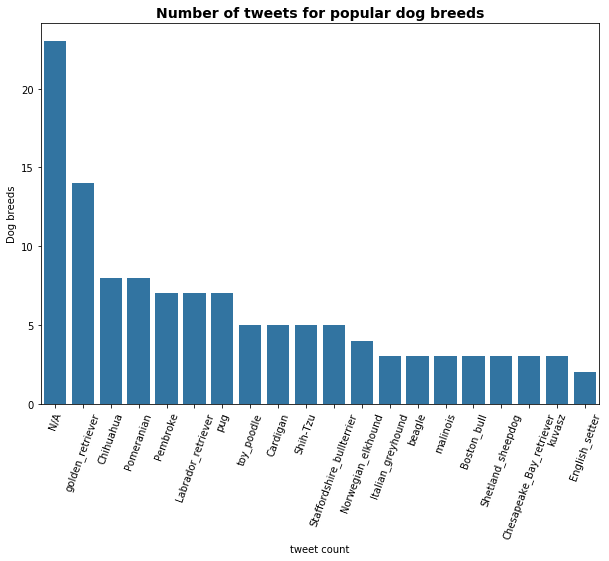

In [96]:
top20_breeds = list(df_tweets['breed'].value_counts().index)[:20]

base_color = sb.color_palette()[0]

plt.figure(figsize = [10, 7])
df_breeds = df_tweets[df_tweets['breed'].isin(top20_breeds)]

ct_counts = df_breeds.groupby(['breed']).size()
ct_counts = ct_counts.reset_index(name = 'count')

sb.barplot(data = ct_counts, x = 'breed', y = 'count', color = base_color, order = top20_breeds); # , bins=bin_edges, rwidth=0.7
plt.title('Number of tweets for popular dog breeds', fontsize = 14, fontweight = 'semibold');
plt.xlabel('tweet count');
plt.ylabel('Dog breeds');
plt.xticks(rotation = 70);

<Figure size 1440x504 with 0 Axes>

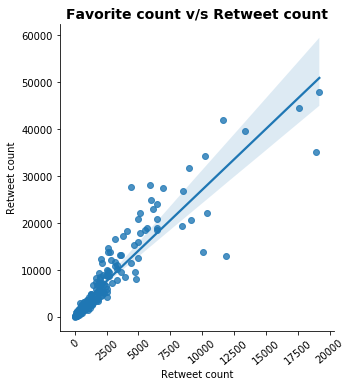

In [97]:
# first i plotted a scatter plot, then i noticed linear relationship
# so i'm plotting regrssion line as well
plt.figure(figsize = [20, 7])
sb.lmplot(data = df_tweets, x = 'retweet_count', y = 'favorite_count');
plt.title('Favorite count v/s Retweet count', fontsize = 14, fontweight = 'semibold');
plt.xlabel('Retweet count');
plt.ylabel('Retweet count');
plt.xticks(rotation = 40);

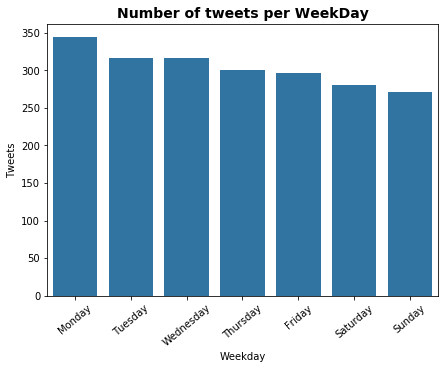

In [98]:
plt.figure(figsize = [7, 5])

ct_counts = df_tweets.groupby(['tweet_weekday']).size()
ct_counts = ct_counts.reset_index(name = 'count')

sb.barplot(data = ct_counts, x = 'tweet_weekday', y = 'count', color = base_color); # , bins=bin_edges, rwidth=0.7
plt.title('Number of tweets per WeekDay', fontsize = 14, fontweight = 'semibold');
plt.xlabel('Weekday');
plt.ylabel('Tweets');
plt.xticks(rotation = 40);

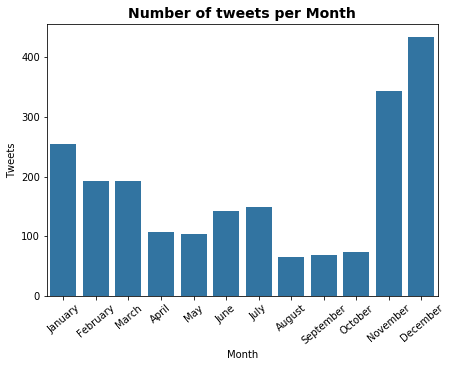

In [99]:
plt.figure(figsize = [7, 5])

ct_counts = df_tweets.groupby(['tweet_month']).size()
ct_counts = ct_counts.reset_index(name = 'count')

sb.barplot(data = ct_counts, x = 'tweet_month', y = 'count', color = base_color); # , bins=bin_edges, rwidth=0.7
plt.title('Number of tweets per Month', fontsize = 14, fontweight = 'semibold');
plt.xlabel('Month');
plt.ylabel('Tweets');
plt.xticks(rotation = 40);

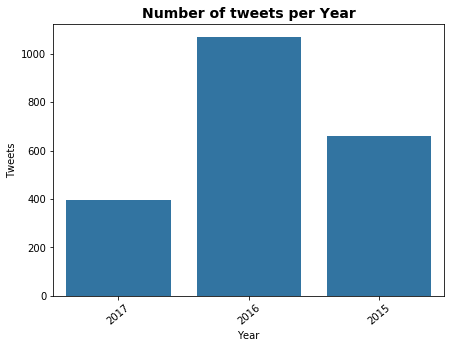

In [100]:
plt.figure(figsize = [7, 5])

ct_counts = df_tweets.groupby(['tweet_year']).size()
ct_counts = ct_counts.reset_index(name = 'count')

orders = list(df_tweets['tweet_year'].unique())

sb.barplot(data = ct_counts, x = 'tweet_year', y = 'count', color = base_color, order = orders); # , bins=bin_edges, rwidth=0.7
plt.title('Number of tweets per Year', fontsize = 14, fontweight = 'semibold');
plt.xlabel('Year');
plt.ylabel('Tweets');
plt.xticks(rotation = 40);

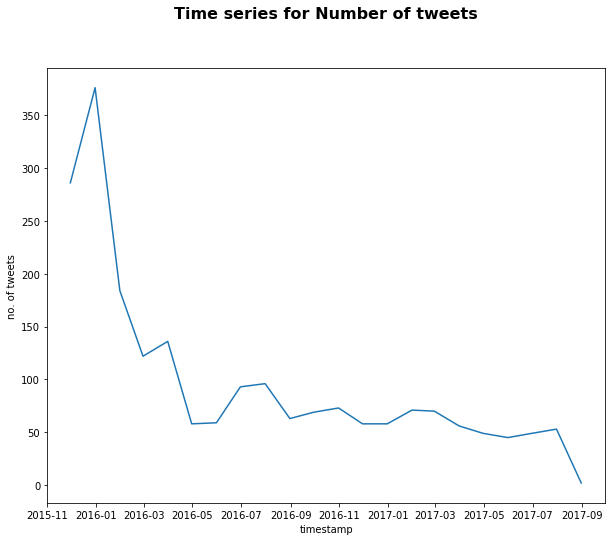

In [101]:
# creating a timeseries for better insight than above plot

# since timestamp is not a primitive data-type we'll use Grouper in pandas
ct_count3 = df_tweets.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count()
ct_count3 = ct_count3.reset_index()

# Plotting time vs. tweets

plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 1), datetime.date(2017, 9, 30)]) 

sb.lineplot(data=ct_count3, x = 'timestamp', y = 'tweet_id') #y = monthly_tweets.timestamp, monthly_tweets.tweet_id
plt.ylabel('no. of tweets')
plt.title('Time series for Number of tweets', fontweight = 'semibold', fontsize = 16, y = 1.1);



## Resources

- [Stack Overflow Regex for URL](https://stackoverflow.com/questions/3809401/what-is-a-good-regular-expression-to-match-a-url)
- [Stack Overflow display all rows](https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook)
- [Regression plot](https://www.geeksforgeeks.org/seaborn-regression-plots/)
- [Line Plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)